In [57]:
# Sample command: python 4.evaluate.py user_vec.pkl buylist_imagef.pkl candidates.pkl
import numpy as np
import pandas as pd
import pickle
import sys
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [70]:
user_vecs = pd.read_pickle('user_vec_cluster.pkl')
candidates = pd.read_pickle('candidates_cluster.pkl')
user_buys = pd.read_pickle('buylist_imagef2.pkl')

In [2]:
def dot(K, L):
    if len(K) != len(L): return 0
    return sum(i[0]*i[1] for i in zip(K, L))

def similarity(item_1, item_2):
    return dot(item_1, item_2) / np.sqrt(dot(item_1, item_1)*dot(item_2, item_2))

def evaluate(predicted, ground_truth):
    maximum = [len(predicted)]
    rank = pd.merge(predicted, ground_truth, on='spu_id')['rank'].tolist()
    if len(rank) > 0:
        return rank
    else:
        return maximum

In [71]:
user_vecs['1'] = 1
candidates['1'] = 1

In [72]:
user_vecs.shape

(5163, 4)

In [73]:
candidates.shape

(226, 4)

In [74]:
candidates = pd.merge(candidates, user_vecs, on='1')

In [75]:
candidates.head()

,goods_no,spu_id,cluster,1,user_id,dt,features
0,S62X0006A121,3918489495497789461,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",1,17940,20170308,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,S62X0006A121,3918489495497789461,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",1,193534,20170307,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.125, 0.0, 0.0..."
2,S62X0006A121,3918489495497789461,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",1,205456,20170308,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,S62X0006A121,3918489495497789461,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",1,251058,20170310,"[0.0769230769231, 0.153846153846, 0.0, 0.0, 0...."
4,S62X0006A121,3918489495497789461,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",1,307275,20170309,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, ..."


In [76]:
candidates.columns = ['goods_no','spu_id', 'goods_features', '1', 'user_id','dt', 'user_features']

In [77]:
candidates['sim'] = candidates.apply(lambda x: similarity(x['user_features'][0:10], x['goods_features'][0:10]), axis=1)

In [78]:
candidates['rank'] = candidates.groupby('user_id')['sim'].rank(ascending=False)

In [79]:
rank = pd.merge(candidates, user_buys, on=['spu_id', 'user_id'])[['spu_id', 'user_id', 'rank']]

In [46]:
print rank

                   spu_id    user_id   rank
0     3918489495497789461      17940   26.0
1     3918489495497789461    2259196  111.0
2     3918489495497789461    5163437  134.0
3     3918489495497789461   29046753   17.0
4     3918489495497789461   33715823    4.0
5     3918489495497789461   50368481  110.0
6     3918489495497789461   55679487   95.0
7     3918489495497789461   58656246  153.0
8     3918489495497789461   66464057   99.0
9     3918489495497789461   87656438   69.0
10    3918489495497789461   88707455  102.0
11    3918489495497789461  107310401   86.0
12    3918489495497789461  109065022    1.0
13    3918489495497789461  127413898   64.0
14    3918489495497789461  184794022   87.0
15    3918489495497789461  185857737  144.0
16    3918489495497789461  204167109  151.0
17    3918489495497789461  207491981  115.0
18    3918489495497789461  229603199   87.0
19    3918489495497789461  232523036   33.0
20    3918489495497789461  234390522    4.0
21    3918489495497789461  23731

In [64]:
rank['rank']

0        26.0
1       111.0
2       134.0
3        17.0
4         4.0
5       110.0
6        95.0
7       153.0
8        99.0
9        69.0
10      102.0
11       86.0
12        1.0
13       64.0
14       87.0
15      144.0
16      151.0
17      115.0
18       87.0
19       33.0
20        4.0
21       38.0
22        5.0
23      187.0
24      136.0
25      216.0
26        3.0
27      218.0
28       94.0
29       45.0
        ...  
4842     68.0
4843    132.0
4844     66.0
4845    102.0
4846      9.0
4847    184.0
4848    125.0
4849     46.0
4850     64.0
4851     61.0
4852    215.0
4853    129.0
4854      7.0
4855     40.0
4856     31.0
4857     67.0
4858     54.0
4859     94.0
4860     91.0
4861     73.0
4862    166.0
4863     53.0
4864    114.0
4865     16.0
4866      2.0
4867     11.0
4868     18.0
4869     28.5
4870    174.5
4871     57.5
Name: rank, dtype: float64

Average

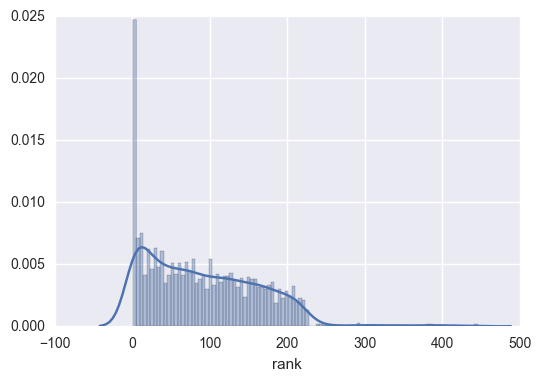

In [68]:
sns.distplot(rank['rank'], bins = 100)

Cluster

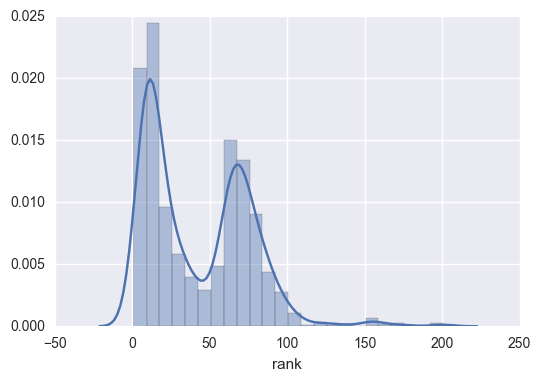

In [84]:
sns.distplot(rank.dropna()['rank'])

In [90]:
user_vecs

,user_id,dt,features,1
0,17940,20170308,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
1,193534,20170307,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.125, 0.0, 0.0...",1
2,205456,20170308,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
3,251058,20170310,"[0.0769230769231, 0.153846153846, 0.0, 0.0, 0....",1
4,307275,20170309,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, ...",1
5,320825,20170309,"[0.0, 0.0, 0.0, 0.0, 0.142857142857, 0.0, 0.0,...",1
6,377694,20170307,"[0.1875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09375, 0.0...",1
7,431954,20170308,"[0.0, 0.111111111111, 0.444444444444, 0.0, 0.0...",1
8,447105,20170308,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.375, 0.0, 0.0...",1
9,657010,20170310,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1


In [101]:
result = []
for idx, user_vec in user_vecs.iterrows():
    print idx
    user_id = user_vec['user_id']
    user_vector = user_vec['features']
    user_buy = user_buys[user_buys['user_id']==user_id]
    result.append(evaluate(candidates, user_buy))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27